# **1. Research Productivity by Academy**

In [4]:
import pandas as pd

# File paths for each academy's works data in CSV format
file_paths = {
    "/content/tuba_works_filtered_restored.csv",
    "/content/ba_works_filtered_restored.csv",
    "/content/knaw_works_filtered_restored.csv",
    "/content/austrian_academy_works_filtered_restored.csv"
}

# List to store statistics
stats = []

# Process each CSV file
for file_path in file_paths:
    academy = file_path.split('_')[0].upper()  # Extract academy name from the file name

    # Read the CSV file
    data = pd.read_csv(file_path)

    # Count total authors and total works
    total_authors = data['author_name'].nunique()  # Unique authors
    total_works = len(data)  # Total works (rows in CSV)
    avg_works_per_author = total_works / total_authors if total_authors > 0 else 0  # Average works per author

    stats.append({
        "Academy": academy,
        "Total Authors": total_authors,
        "Total Works": total_works,
        "Average Works per Author": round(avg_works_per_author, 2)
    })

# Convert the statistics to a DataFrame for better visualization
stats_df = pd.DataFrame(stats)

# Print the statistics
print(stats_df)

             Academy  Total Authors  Total Works  Average Works per Author
0      /CONTENT/KNAW            622       100437                    161.47
1  /CONTENT/AUSTRIAN            950       127365                    134.07
2        /CONTENT/BA            275        40388                    146.87
3      /CONTENT/TUBA            219        29445                    134.45


<Figure size 1200x800 with 0 Axes>

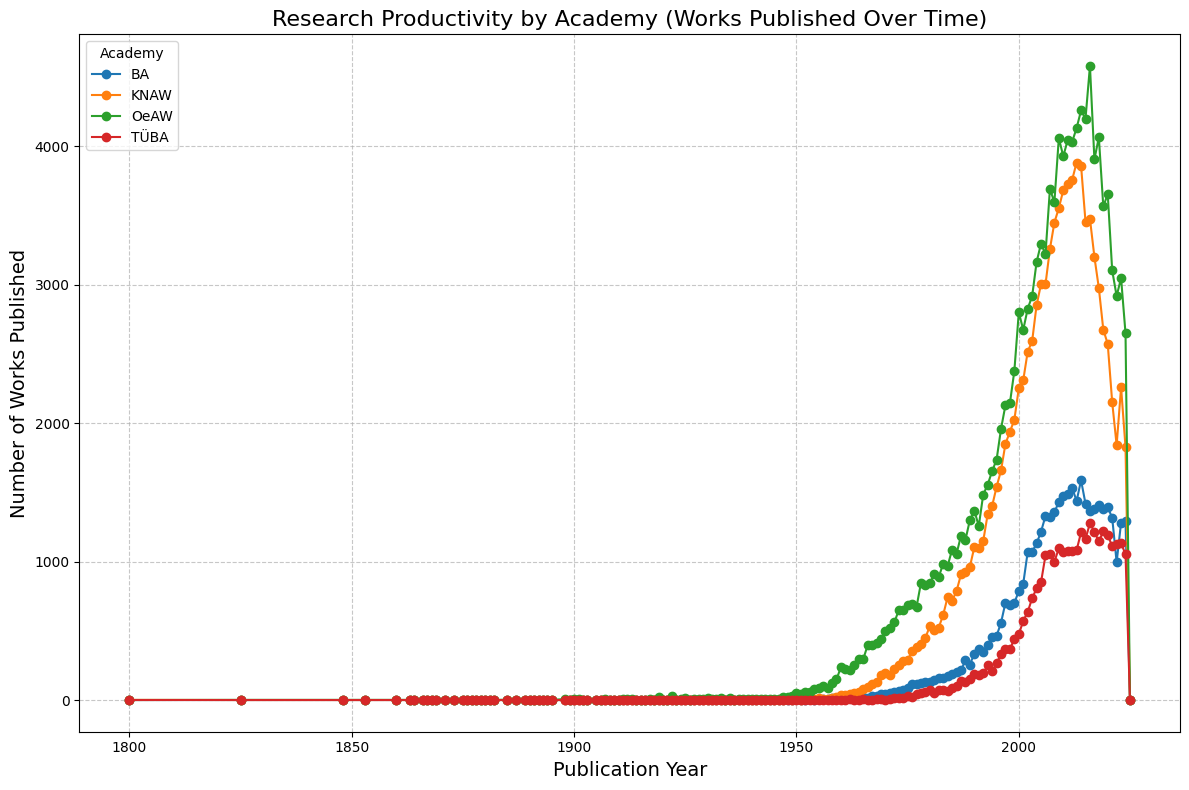

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for CSV works data
files = {
    "TÜBA": "/content/tuba_works_filtered_restored.csv",
    "BA": "/content/ba_works_filtered_restored.csv",
    "KNAW": "/content/knaw_works_filtered_restored.csv",
    "OeAW": "/content/austrian_academy_works_filtered_restored.csv"
}

# Initialize a list to store all works data
all_works = []

# Load data from each file and append to the list
for academy, file_path in files.items():
    # Read the CSV file
    data = pd.read_csv(file_path)
    # Append the relevant columns to all_works
    all_works.extend(
        {"Academy": academy, "Publication Year": row["publication_year"]}
        for _, row in data.iterrows() if not pd.isna(row["publication_year"])
    )

# Convert the works data to a DataFrame
df = pd.DataFrame(all_works)

# Convert publication year to integer
df["Publication Year"] = df["Publication Year"].astype(int)

# Group by academy and year to count publications
publication_counts = df.groupby(["Academy", "Publication Year"]).size().reset_index(name="Count")

# Pivot data for visualization
pivot_df = publication_counts.pivot(index="Publication Year", columns="Academy", values="Count").fillna(0)

# Plot the data
plt.figure(figsize=(12, 8))
pivot_df.plot(kind="line", marker="o", figsize=(12, 8))
plt.title("Research Productivity by Academy (Works Published Over Time)", fontsize=16)
plt.xlabel("Publication Year", fontsize=14)
plt.ylabel("Number of Works Published", fontsize=14)
plt.legend(title="Academy")
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# **2. Citation Impact**

  Academy  Total Citations  Total Works  Average Citations per Work
0    TÜBA          2180270        29445                       74.05
1      BA          2748914        40388                       68.06
2    KNAW         11092659       100437                      110.44
3    OeAW         10110976       127365                       79.39


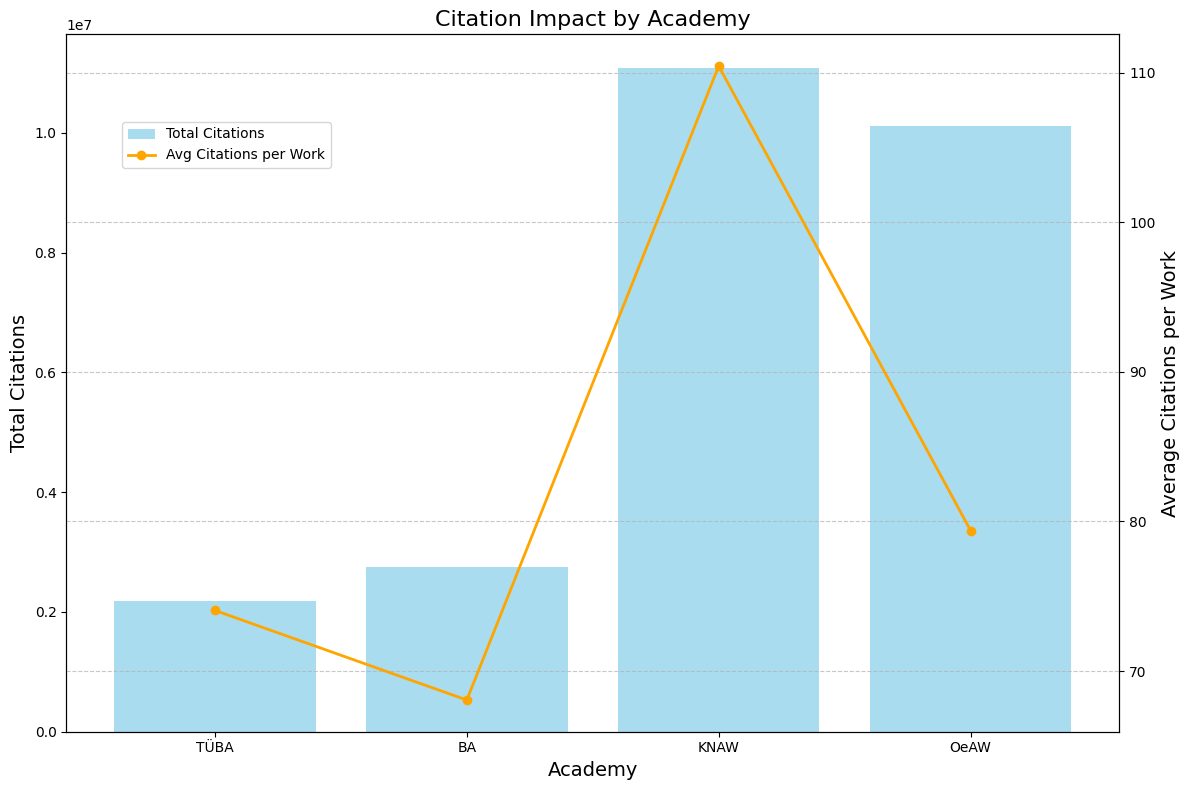

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for CSV works data
files = {
    "TÜBA": "/content/tuba_works_filtered_restored.csv",
    "BA": "/content/ba_works_filtered_restored.csv",
    "KNAW": "/content/knaw_works_filtered_restored.csv",
    "OeAW": "/content/austrian_academy_works_filtered_restored.csv"
}

# Initialize a list to store citation data
citation_data = []

# Load data from each file and calculate citation statistics
for academy, file_path in files.items():
    # Read the CSV file
    data = pd.read_csv(file_path)

    # Filter out works with missing citation counts
    data = data.dropna(subset=["cited_by_count"])

    # Calculate statistics
    total_citations = data["cited_by_count"].sum()
    total_works = len(data)
    avg_citations_per_work = total_citations / total_works if total_works > 0 else 0

    # Append to citation data
    citation_data.append({
        "Academy": academy,
        "Total Citations": total_citations,
        "Total Works": total_works,
        "Average Citations per Work": round(avg_citations_per_work, 2)
    })

# Convert citation data to a DataFrame for visualization
citation_df = pd.DataFrame(citation_data)

# Display the citation statistics
print(citation_df)

# Plot total citations and average citations per work
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for total citations
ax1.bar(citation_df["Academy"], citation_df["Total Citations"], color='skyblue', alpha=0.7, label="Total Citations")
ax1.set_ylabel("Total Citations", fontsize=14)
ax1.set_xlabel("Academy", fontsize=14)
ax1.set_title("Citation Impact by Academy", fontsize=16)

# Line plot for average citations per work
ax2 = ax1.twinx()
ax2.plot(citation_df["Academy"], citation_df["Average Citations per Work"], color='orange', marker="o", linewidth=2, label="Avg Citations per Work")
ax2.set_ylabel("Average Citations per Work", fontsize=14)

# Add legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.85))

plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# **3.	Research Fields and Primary Topics**

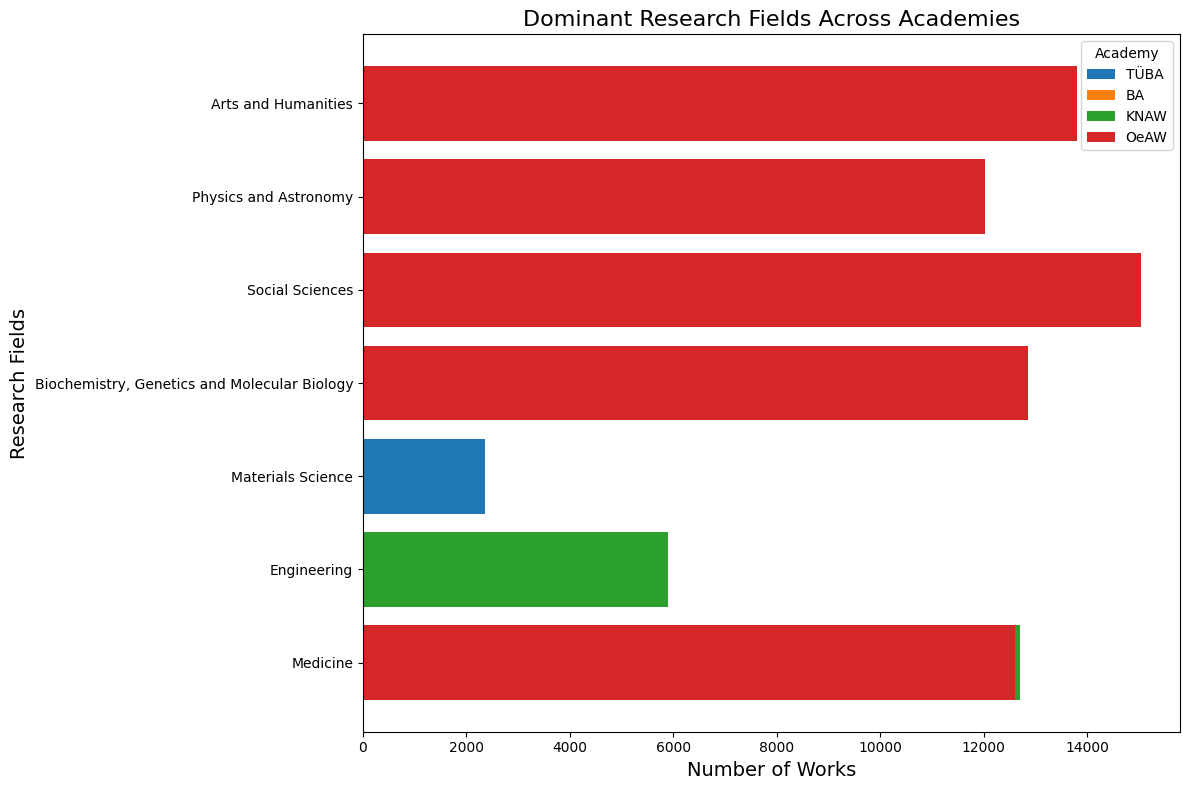

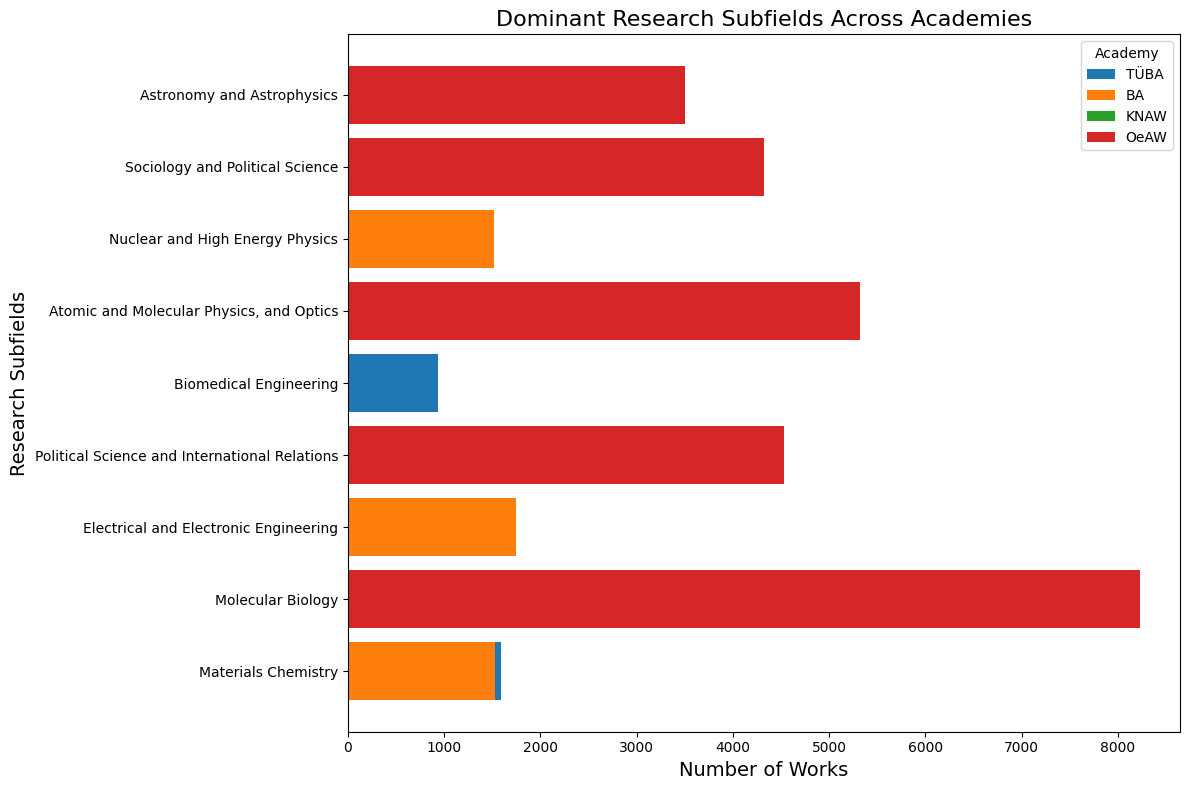

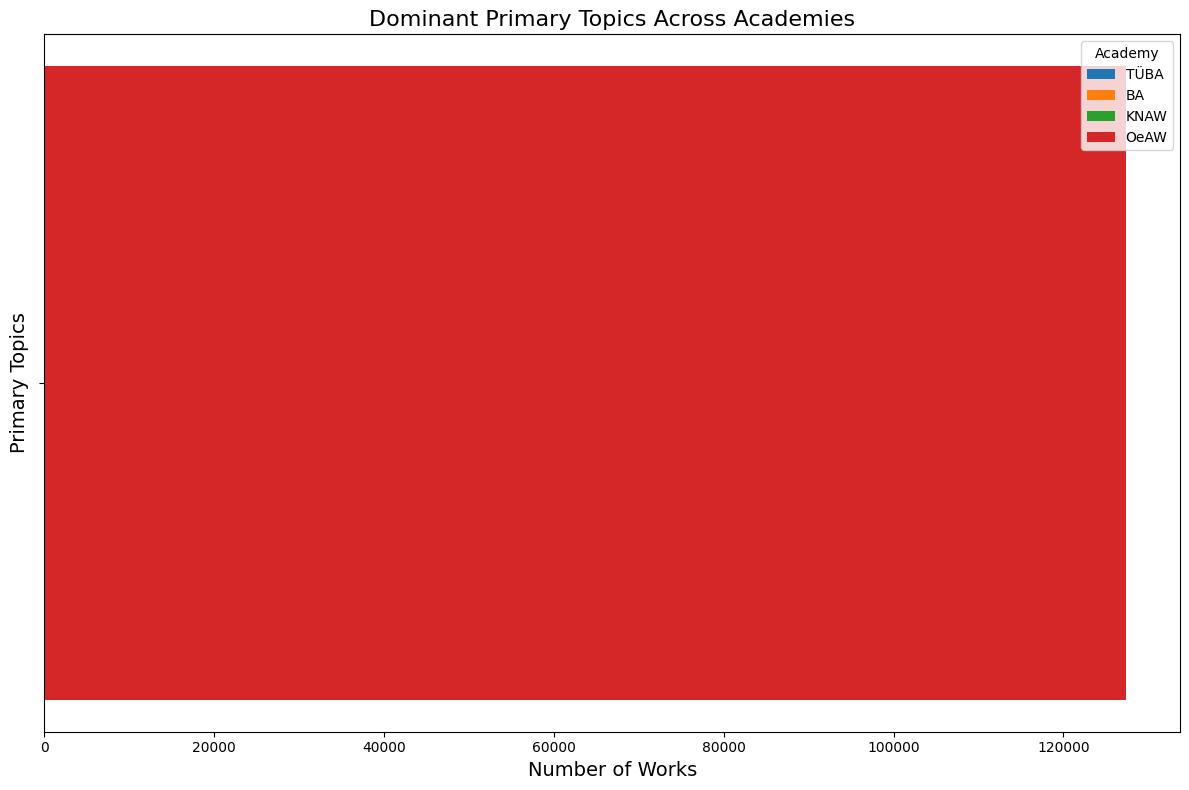

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for works CSV data
files = {
    "TÜBA": "/content/tuba_works_filtered_restored.csv",
    "BA": "/content/ba_works_filtered_restored.csv",
    "KNAW": "/content/knaw_works_filtered_restored.csv",
    "OeAW": "/content/austrian_academy_works_filtered_restored.csv"
}

# Initialize a list to store all works data
all_works = []

# Load data from each file and append to the list
for academy, file_path in files.items():
    # Read the CSV file
    data = pd.read_csv(file_path)
    # Append relevant data to all_works
    for _, row in data.iterrows():
        all_works.append({
            "Academy": academy,
            "Field": row.get("field", ""),
            "Subfield": row.get("subfield", ""),
            "Primary Topic": row.get("primary_topic", "")
        })

# Convert the works data to a DataFrame
df = pd.DataFrame(all_works)

# Group by academy and field to count occurrences
field_counts = df.groupby(["Academy", "Field"]).size().reset_index(name="Count")

# Plot dominant fields
plt.figure(figsize=(12, 8))
for academy in files.keys():
    academy_fields = field_counts[field_counts["Academy"] == academy]
    top_fields = academy_fields.nlargest(5, "Count")  # Top 5 fields for each academy
    plt.barh(top_fields["Field"], top_fields["Count"], label=academy)

plt.title("Dominant Research Fields Across Academies", fontsize=16)
plt.xlabel("Number of Works", fontsize=14)
plt.ylabel("Research Fields", fontsize=14)
plt.legend(title="Academy")
plt.tight_layout()
plt.show()

# Group by academy and subfield to count occurrences
subfield_counts = df.groupby(["Academy", "Subfield"]).size().reset_index(name="Count")

# Plot dominant subfields
plt.figure(figsize=(12, 8))
for academy in files.keys():
    academy_subfields = subfield_counts[subfield_counts["Academy"] == academy]
    top_subfields = academy_subfields.nlargest(5, "Count")  # Top 5 subfields for each academy
    plt.barh(top_subfields["Subfield"], top_subfields["Count"], label=academy)

plt.title("Dominant Research Subfields Across Academies", fontsize=16)
plt.xlabel("Number of Works", fontsize=14)
plt.ylabel("Research Subfields", fontsize=14)
plt.legend(title="Academy")
plt.tight_layout()
plt.show()

# Group by academy and primary topic to count occurrences
topic_counts = df.groupby(["Academy", "Primary Topic"]).size().reset_index(name="Count")

# Plot dominant primary topics
plt.figure(figsize=(12, 8))
for academy in files.keys():
    academy_topics = topic_counts[topic_counts["Academy"] == academy]
    top_topics = academy_topics.nlargest(5, "Count")  # Top 5 topics for each academy
    plt.barh(top_topics["Primary Topic"], top_topics["Count"], label=academy)

plt.title("Dominant Primary Topics Across Academies", fontsize=16)
plt.xlabel("Number of Works", fontsize=14)
plt.ylabel("Primary Topics", fontsize=14)
plt.legend(title="Academy")
plt.tight_layout()
plt.show()

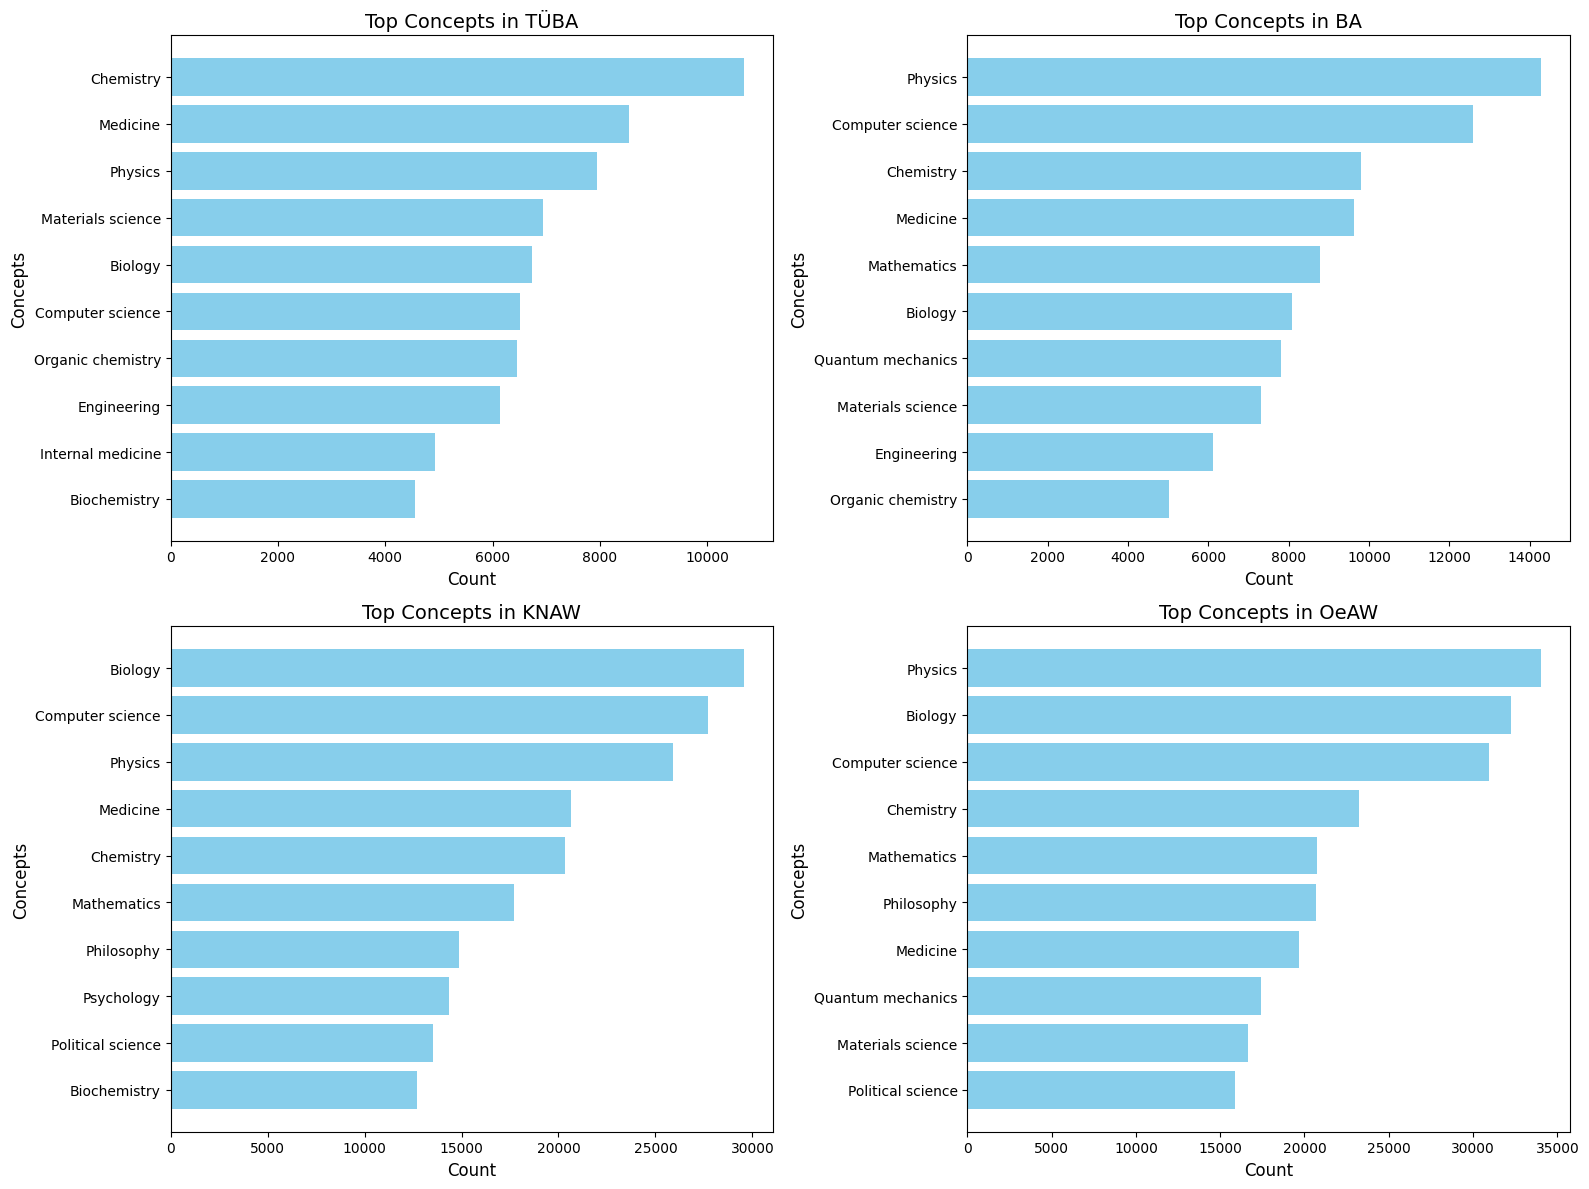

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# File paths for works CSV data
files = {
    "TÜBA": "/content/tuba_works_filtered_restored.csv",
    "BA": "/content/ba_works_filtered_restored.csv",
    "KNAW": "/content/knaw_works_filtered_restored.csv",
    "OeAW": "/content/austrian_academy_works_filtered_restored.csv"
}

# Initialize a dictionary to store concept data
concept_data = {academy: [] for academy in files.keys()}

# Load data from each file and extract concepts
for academy, file_path in files.items():
    # Read the CSV file
    data = pd.read_csv(file_path)
    # Extract concepts for each work
    for _, row in data.iterrows():
        concepts = str(row.get("concepts", "")).split(", ")  # Split concepts if stored as comma-separated values
        concept_data[academy].extend(concepts)

# Analyze and visualize top concepts for each academy
plt.figure(figsize=(16, 12))
for i, (academy, concepts) in enumerate(concept_data.items(), 1):
    # Count the occurrences of each concept
    concept_counts = Counter(concepts)
    top_concepts = concept_counts.most_common(10)  # Top 10 concepts
    concepts, counts = zip(*top_concepts) if top_concepts else ([], [])

    # Plot the top concepts
    plt.subplot(2, 2, i)
    plt.barh(concepts, counts, color="skyblue")
    plt.title(f"Top Concepts in {academy}", fontsize=14)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("Concepts", fontsize=12)
    plt.gca().invert_yaxis()  # Reverse the order for better visualization

plt.tight_layout()
plt.show()

# **4. Alignment with Sustainable Development Goals (SDGs)**

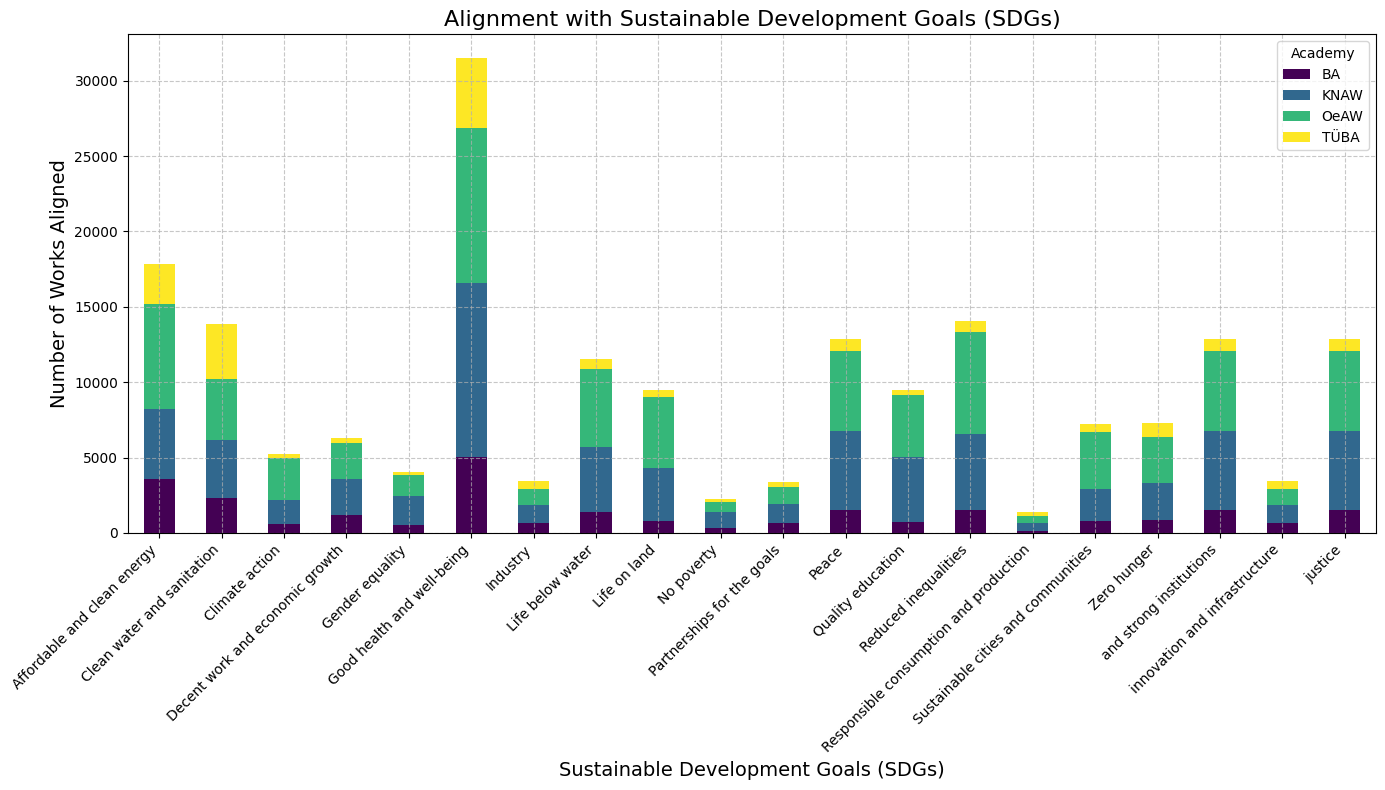

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for CSV works data
files = {
    "TÜBA": "/content/tuba_works_filtered_restored.csv",
    "BA": "/content/ba_works_filtered_restored.csv",
    "KNAW": "/content/knaw_works_filtered_restored.csv",
    "OeAW": "/content/austrian_academy_works_filtered_restored.csv"
}

# Initialize a dictionary to store SDG data
sdg_data = {"Academy": [], "SDG": []}

# Load data from each file
for academy, file_path in files.items():
    # Read the CSV file
    data = pd.read_csv(file_path)

    # Process the `sustainable_development_goals` column
    if "sustainable_development_goals" in data.columns:
        for sdg_list in data["sustainable_development_goals"]:
            if pd.notna(sdg_list):  # Ensure the value is not NaN
                # Split the SDG list into individual entries
                sdg_entries = [sdg.strip() for sdg in sdg_list.split(",")]
                for sdg in sdg_entries:
                    sdg_data["Academy"].append(academy)
                    sdg_data["SDG"].append(sdg)

# Convert the SDG data to a DataFrame
sdg_df = pd.DataFrame(sdg_data)

# Check if SDG data exists
if sdg_df.empty:
    print("No SDG data available to analyze.")
else:
    # Group by academy and SDG to get counts
    sdg_summary = sdg_df.groupby(["Academy", "SDG"]).size().reset_index(name="Count")

    # Pivot the data for visualization
    pivot_sdg = sdg_summary.pivot(index="SDG", columns="Academy", values="Count").fillna(0)

    # Plot the data
    pivot_sdg.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="viridis")
    plt.title("Alignment with Sustainable Development Goals (SDGs)", fontsize=16)
    plt.xlabel("Sustainable Development Goals (SDGs)", fontsize=14)
    plt.ylabel("Number of Works Aligned", fontsize=14)
    plt.legend(title="Academy", fontsize=10)
    plt.xticks(rotation=45, ha="right")
    plt.grid(visible=True, linestyle="--", alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()

# **5. Open Access Trends**

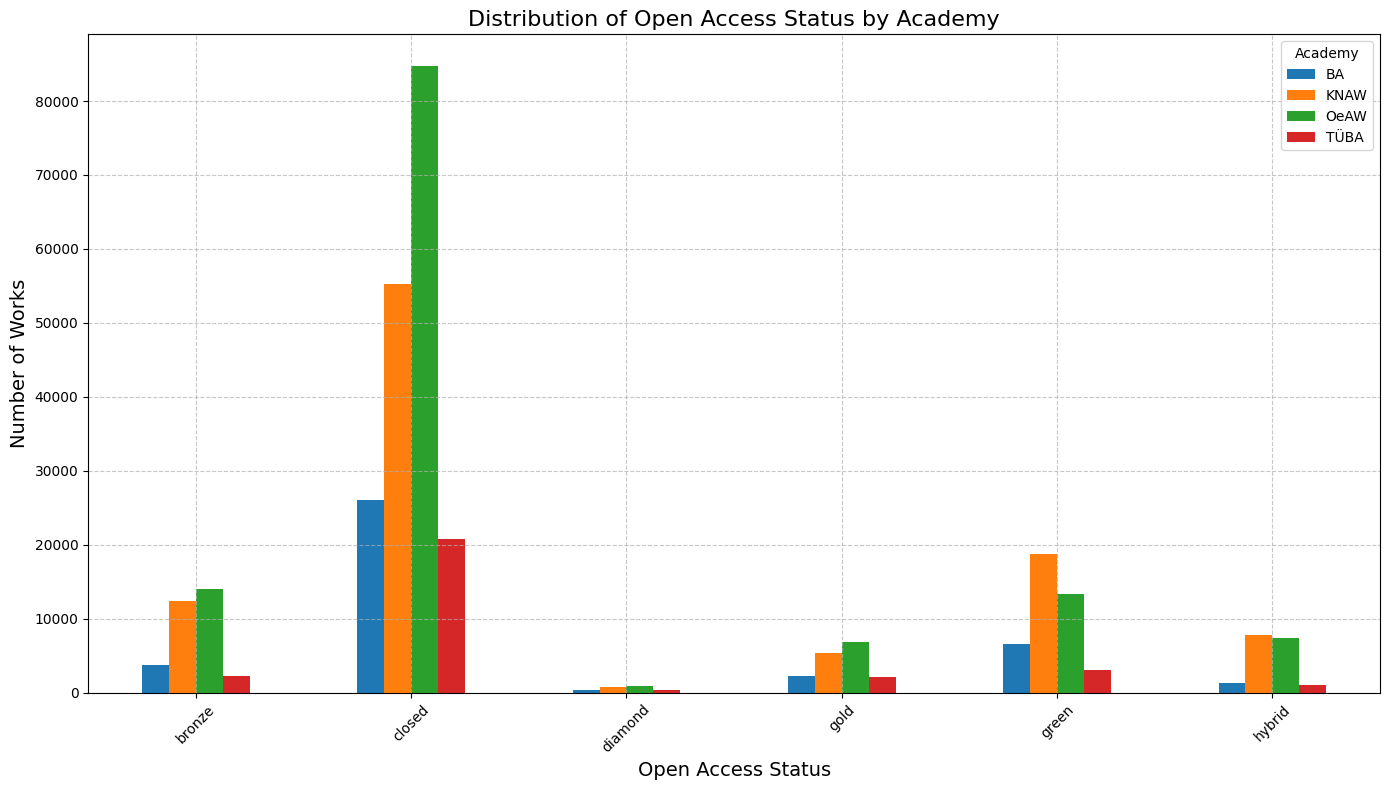

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a DataFrame to store aggregated results
access_stats = []

# Iterate through each academy's works file
for academy, file_path in files.items():
    # Load data
    data = pd.read_csv(file_path)

    # Count occurrences of each open access status
    access_status_counts = data["open_access_status"].value_counts()

    # Append data to the stats list
    for status, count in access_status_counts.items():
        access_stats.append({
            "Academy": academy,
            "Access Status": status,
            "Count": count
        })

# Convert stats to a DataFrame
access_stats_df = pd.DataFrame(access_stats)

# Pivot data for visualization
pivot_access_stats = access_stats_df.pivot(index="Access Status", columns="Academy", values="Count").fillna(0)

# Plot the data
pivot_access_stats.plot(kind="bar", figsize=(14, 8))
plt.title("Distribution of Open Access Status by Academy", fontsize=16)
plt.xlabel("Open Access Status", fontsize=14)
plt.ylabel("Number of Works", fontsize=14)
plt.legend(title="Academy")
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

#	6.	Author **H-Index and I10-Index Distribution**

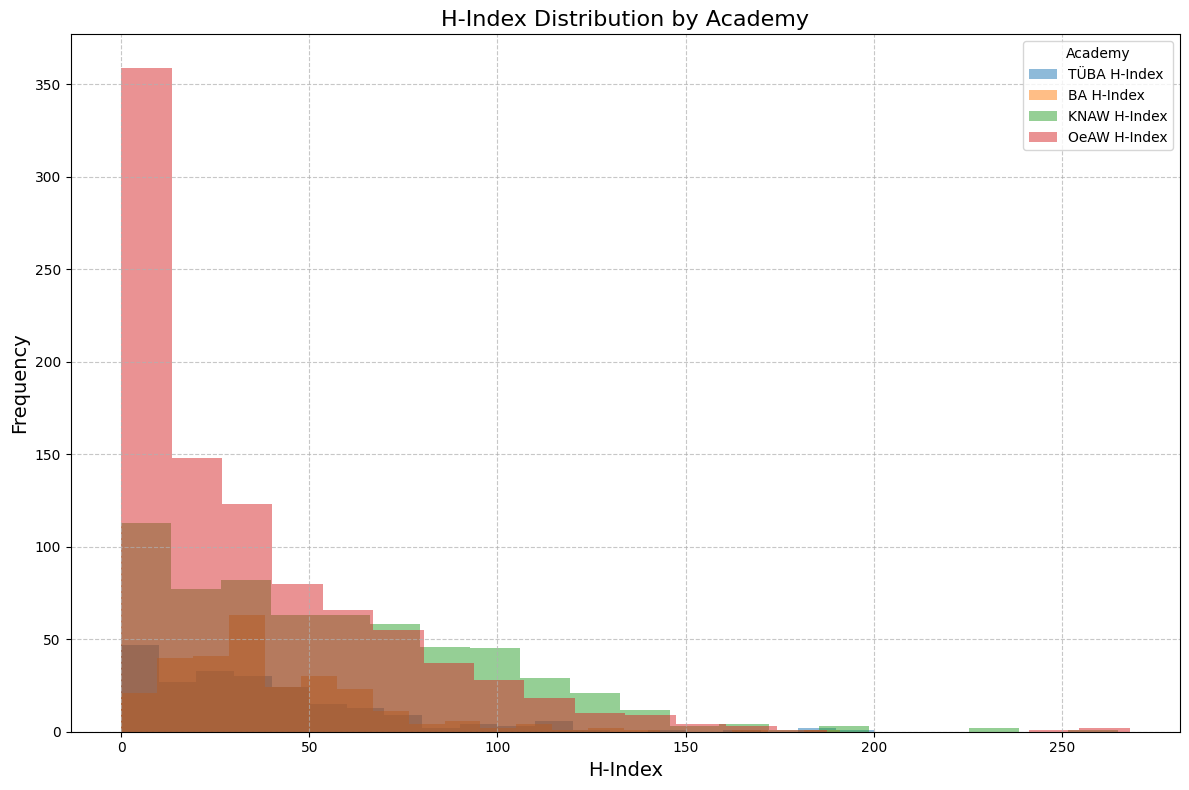

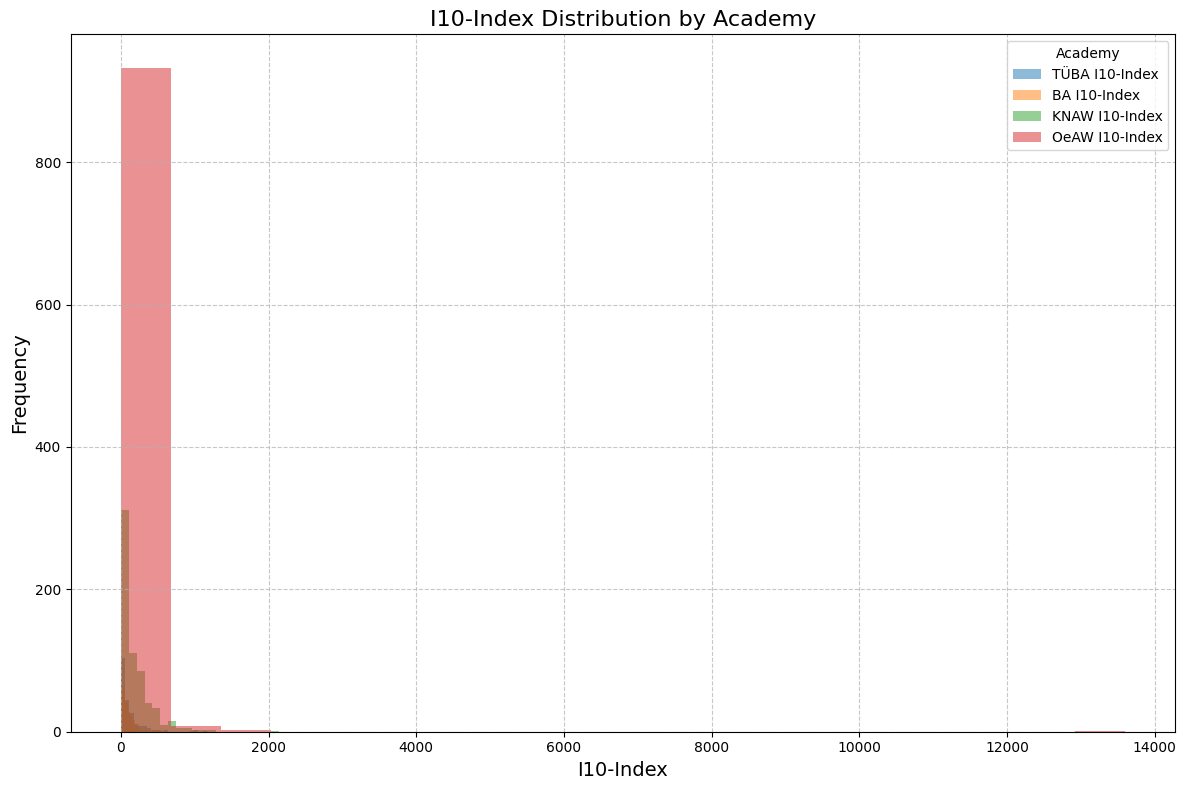

In [23]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# File paths for JSON member data with indices
files = {
    "TÜBA": "/content/tuba_members_with_indices_restored.json",
    "BA": "/content/ba_members_with_indices_restored.json",
    "KNAW": "/content/knaw_members_with_indices_restored.json",
    "OeAW": "/content/austrian_academy_members_with_indices_restored.json"
}

# Initialize a DataFrame to store all indices data
all_indices = []

# Load data from each file
for academy, file_path in files.items():
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        for member in data:
            all_indices.append({
                "Academy": academy,
                "H-Index": member.get("h_index", None),
                "I10-Index": member.get("i10_index", None)
            })

# Convert the indices data to a DataFrame
df = pd.DataFrame(all_indices)

# Drop rows with missing H-Index or I10-Index values
df = df.dropna(subset=["H-Index", "I10-Index"])

# Convert H-Index and I10-Index to integers
df["H-Index"] = df["H-Index"].astype(int)
df["I10-Index"] = df["I10-Index"].astype(int)

# Plot H-Index distribution
plt.figure(figsize=(12, 8))
for academy in df["Academy"].unique():
    academy_data = df[df["Academy"] == academy]
    plt.hist(academy_data["H-Index"], bins=20, alpha=0.5, label=f"{academy} H-Index")

plt.title("H-Index Distribution by Academy", fontsize=16)
plt.xlabel("H-Index", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(title="Academy")
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Plot I10-Index distribution
plt.figure(figsize=(12, 8))
for academy in df["Academy"].unique():
    academy_data = df[df["Academy"] == academy]
    plt.hist(academy_data["I10-Index"], bins=20, alpha=0.5, label=f"{academy} I10-Index")

plt.title("I10-Index Distribution by Academy", fontsize=16)
plt.xlabel("I10-Index", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(title="Academy")
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()